In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import itertools

In [2]:
df=pd.read_csv('dataset/fake_news.csv')
df=df.dropna()
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
X=df.drop('label',axis=1)
y=df['label']

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data=df.copy()
data.reset_index(inplace=True)
data['title'][10]

'Russian Researchers Discover Secret Nazi Military Base ‘Treasure Hunter’ in the Arctic [Photos]'

In [6]:
ps = PorterStemmer()
temp = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    temp.append(review)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(temp).toarray()
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [8]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [10]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

In [11]:
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

accuracy:   0.902


In [12]:
classes=['FAKE', 'REAL']
title='Confusion matrix'
cmap=plt.cm.Blues
normalize=False

Confusion matrix, without normalization


Text(0.5, -0.10229073212243733, 'Predicted label')

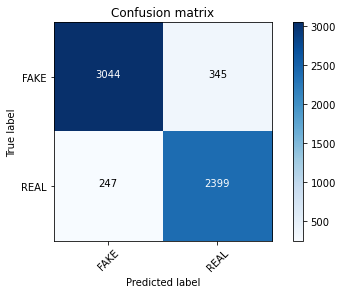

In [13]:
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
else:
    print('Confusion matrix, without normalization')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [14]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [15]:
metrics.accuracy_score(y_test, pred)

0.9019055509527755